Artículo original:

https://www.analyticsvidhya.com/blog/2021/05/covid-19-vaccination-data-analysis-visualization/


Dataset (actualizado al 14 de mayo del 2021):

https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Archivos:

country_vaccinations.csv

country_vaccinations_by_manufacturer.csv


# Vacuna Covid-19: Análisis y visualización de datos

Vamos a analizar y visualizar la última situación de la "Vacunación Covid19" en todo el mundo.

Utilizaremos la distribución Anaconda y las librerías plotly y seaborn para la visualización de datos y para el análisis de datos utilizaremos pandas.

Si no dispone de los paquetes en Anaconda desde el shell se instalan con los comandos conda install -c "paquete".

Ejemplo:

conda install -c plotly plotly

conda install -c conda-forge wordcloud

conda install -c conda-forge pywaffle


### Librerías a utilizar

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from pywaffle import Waffle
import warnings
warnings.filterwarnings('ignore')

### Leer los datos

Se ha creado una carpeta en el directorio de trabajo denominado "dataset" donde se almacenan los archivos csv descargados


In [7]:
df = pd.read_csv('dataset/country_vaccinations.csv')

In [11]:
new_df = df.groupby(['country','iso_code','vaccines'])['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred'
,'daily_vaccinations_per_million'].max().reset_index()

### ¿Cuál es la proporción de la vacuna Top 10 en la carrera de la lucha contra el Covid19?

In [12]:
print( new_df['vaccines'].value_counts().nlargest(10))

Oxford/AstraZeneca                                                   60
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         19
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        14
Oxford/AstraZeneca, Pfizer/BioNTech                                  13
Pfizer/BioNTech                                                      11
Oxford/AstraZeneca, Sinopharm/Beijing                                 9
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                          9
Sputnik V                                                             8
Moderna, Pfizer/BioNTech                                              8
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     8
Name: vaccines, dtype: int64


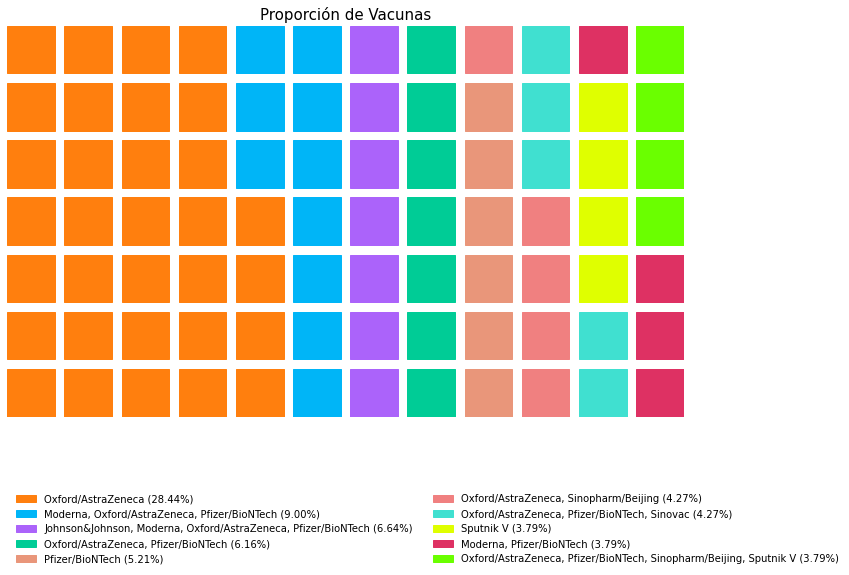

In [15]:
data = dict(new_df['vaccines'].value_counts(normalize = True).nlargest(10)*100)
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'] 
fig = plt.figure( 
    rows=7,
    columns=12,
    FigureClass = Waffle, 
    values = data, 
    title={'label': 'Proporción de Vacunas', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

#### Observación:

En un rango de porcentaje de vacunas el 28,44% utilizó Oxford/AstraZeneca

Oxford/AstraZeneca es la vacuna más utilizada

Más tarde, Pfizer/BioNTech fue la vacuna más utilizada y ahora está en el 5º lugar, también Oxford/AstraZeneca no estaba en el top 3 y ahora está en el 1º lugar

Parece que Oxford/AstraZeneca es la que mejor funciona entre las vacunas


### ¿Cuál es el número de vacunaciones totales y diarias según los países?

In [17]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title='Número de vacunaciones totales según los países',)
fig.show()

In [18]:
data = new_df[['country','daily_vaccinations']].nlargest(25,'daily_vaccinations')
fig = px.bar(data, x = 'country',y = 'daily_vaccinations',title='Número de vacunaciones diarias según los países',)
fig.show()

### ¿Qué vacuna utiliza cada país?

In [37]:
vacc = new_df['vaccines'].unique()
for i in vacc:
    c = list(new_df[new_df["vaccines"] == i]['country'])
    print(f'Vacuna: {i}\nUsada en los países: {c}')
    print("\n")

Vacuna: Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Usada en los países: ['Afghanistan', 'Maldives', 'Peru']


Vacuna: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Usada en los países: ['Albania', 'Bosnia and Herzegovina']


Vacuna: Sputnik V
Usada en los países: ['Algeria', 'Armenia', 'Belarus', 'Guinea', 'Kazakhstan', 'Paraguay', 'Syria', 'Venezuela']


Vacuna: Oxford/AstraZeneca, Pfizer/BioNTech
Usada en los países: ['Andorra', 'Australia', 'Cape Verde', 'Cayman Islands', 'Costa Rica', 'Isle of Man', 'Jersey', 'Oman', 'Panama', 'Saudi Arabia', 'Slovenia', 'South Korea', 'Sweden']


Vacuna: Oxford/AstraZeneca
Usada en los países: ['Angola', 'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Bhutan', 'Botswana', 'Brunei', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Dominica', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'French Polynesia', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guyana', 'Jamaica', 'Kosovo', 'Lesotho

In [24]:
fig = px.choropleth(new_df,locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vacunas utilizadas por países específicos',hover_data= ['total_vaccinations'])
fig.show()

### ¿Qué vacuna se utiliza más?

In [26]:
vaccine = new_df['vaccines'].value_counts().reset_index()
vaccine.columns = ['Vacunas','Número de países']
vaccine.nlargest(5,'Número de países')

,Vacunas,Número de países
0,Oxford/AstraZeneca,60
1,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",19
2,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",14
3,"Oxford/AstraZeneca, Pfizer/BioNTech",13
4,Pfizer/BioNTech,11


### Total de vacunas por país agrupadas por vacunas:

In [27]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',
                 path = ['vaccines','country'],
                 title='Total de vacunas por país agrupadas por vacunas',
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

In [28]:
fig = go.Choropleth(locations = new_df['country'],locationmode = 'country names',
                    z = new_df['total_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= 'Total de vacunas'))
data = [fig]
layout = go.Layout(title = 'Total de vacunas por país')
fig = dict(data = data,layout = layout)
iplot(fig)

### Vacunas diarias por países:

In [29]:
fig = go.Choropleth(locations = new_df['country'],locationmode = 'country names',
                    z = new_df['daily_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= 'Vacunas diarias'))
data = [fig]
layout = go.Layout(title = 'Vacunas diarias por países')
fig = dict(data = data,layout = layout)
iplot(fig)

### Relación entre el total de vacunas y el total de vacunas por cien:

In [31]:
fig = px.scatter(new_df,x = 'total_vaccinations',y='total_vaccinations_per_hundred',
                 size='total_vaccinations',
                 hover_name = 'country',size_max = 50,
                 title='Total vs. Total de vacunas por cien agrupadas por Vacunas',
                color_discrete_sequence = px.colors.qualitative.Bold)
fig.show()

### ¿Cuál es la tendencia de las vacunaciones totales según los países?

In [34]:
def plot_trend(dataframe,feature,title,country):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,25))
    
    for i,country in enumerate(country):
        plt.subplot(8,4,i+1)
        data = dataframe[dataframe['country'] == country]
        sns.lineplot(x=data['date'] ,y=data[feature],label = feature)
        plt.xlabel('')
        plt.tick_params(axis='x',which='both',top=False,bottom=False,labelbottom=False)
        plt.title(country)
        
    plt.suptitle(title,y=1.05)
    plt.tight_layout()
    plt.show()

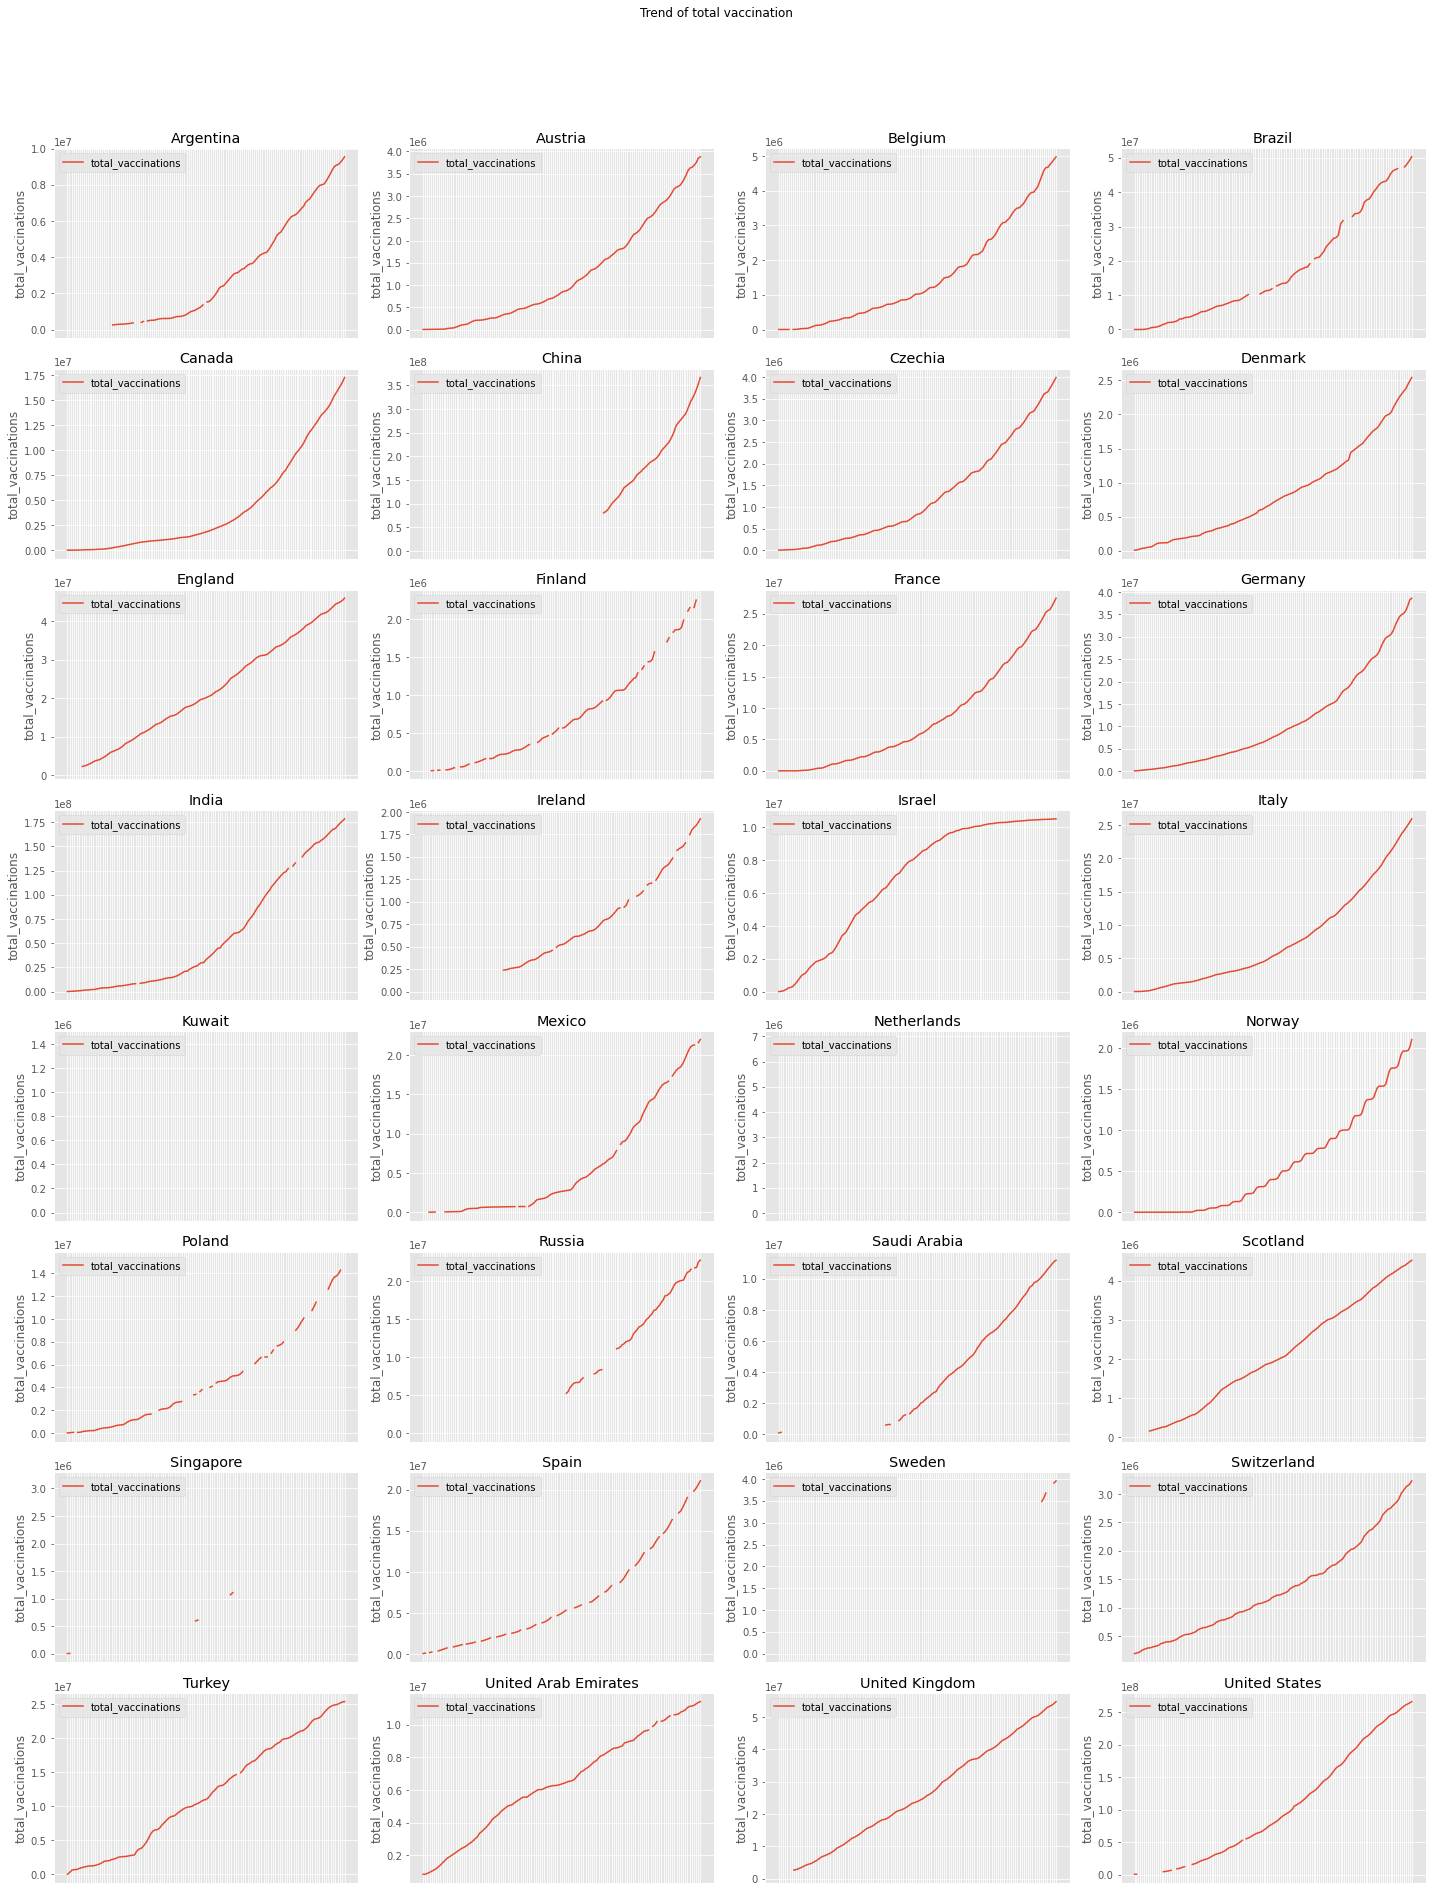

In [35]:
country = ['Argentina', 'Austria', 'Belgium', 'Brazil','Canada','China','Czechia',
           'Denmark', 'England','Finland', 'France','Germany','India','Ireland', 
           'Israel', 'Italy', 'Kuwait','Mexico', 'Netherlands','Norway', 'Poland',
           'Russia','Saudi Arabia', 'Scotland','Singapore','Spain', 'Sweden',
           'Switzerland', 'Turkey','United Arab Emirates', 'United Kingdom', 'United States']
plot_trend(df,'total_vaccinations','Trend of total vaccination',country)